https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57

In [ ]:
import numpy as np
X = np.c_[[1,1,1],[1,2,3]] # defining features
X

array([[1, 1],
       [1, 2],
       [1, 3]])

In [ ]:
type(X)

numpy.ndarray

In [ ]:
y = np.c_[[1,3,2]] # defining labels
y

array([[1],
       [3],
       [2]])

In [ ]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # normal equation
print(theta)

[[1. ]
 [0.5]]


In [ ]:
X_new = np.c_[[1,1,1,1],[0, 0.5,1.5,4]]  # new features

In [ ]:
y_pred = X_new.dot(theta)  # making predictions
print(y_pred)

[[1.  ]
 [1.25]
 [1.75]
 [3.  ]]


-----------------------

https://stackoverflow.com/questions/27476933/numpy-linear-regression-with-regularization

In [ ]:
def get_model(A, y, lamb=0):
    n_col = A.shape[1]
    return np.linalg.lstsq(A.T.dot(A) + lamb * np.identity(n_col), A.T.dot(y))
# Probably at this point we do not need lstsq. 
# We can just use solve. 
# On the other hand, lstsq returns 4 objects, not just coefficients. 

In [ ]:
y_hat = get_model(X, y)
y_hat

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([[1. ],
        [0.5]]), array([], dtype=float64), 2, array([16.6394103,  0.3605897]))

-----------------------

#Scipy identity method

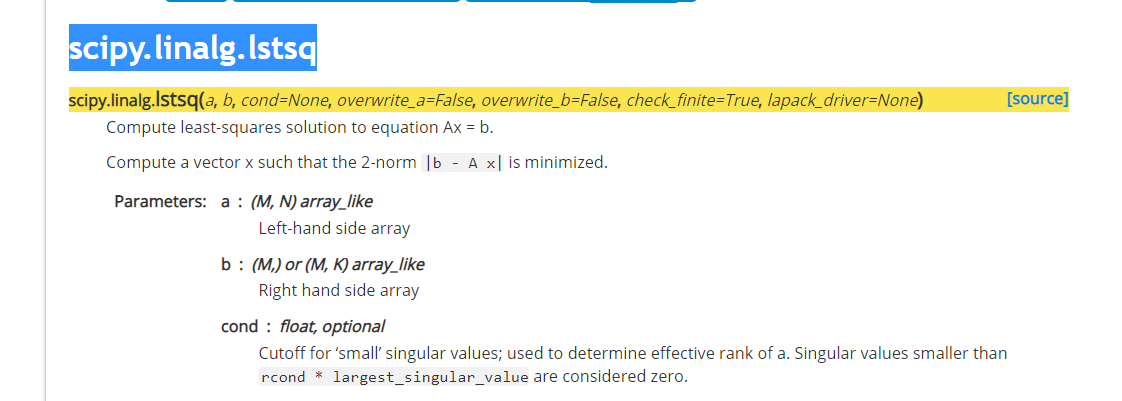

In [ ]:
from scipy.linalg import lstsq
import matplotlib.pyplot as plt

In [ ]:
x = np.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

In [ ]:
M = x[:, np.newaxis]**[0, 2]
M

array([[ 1.  ,  1.  ],
       [ 1.  ,  6.25],
       [ 1.  , 12.25],
       [ 1.  , 16.  ],
       [ 1.  , 25.  ],
       [ 1.  , 49.  ],
       [ 1.  , 72.25]])

In [ ]:
p, res, rnk, s = lstsq(M, y)
p, res, rnk, s

(array([0.20925829, 0.12013861]),
 0.4082665237440333,
 2,
 array([93.25228799,  1.7883749 ]))

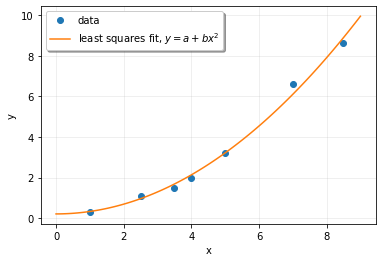

In [ ]:
plt.plot(x, y, 'o', label='data')
xx = np.linspace(0, 9, 101)
yy = p[0] + p[1]*xx**2
plt.plot(xx, yy, label='least squares fit, $y = a + bx^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()